# 201884052 이지혁 프로그래밍3 기말대체과제 이동통신 사용자중 이탈자 분석하기

* 분석 포인트 : 이동통신 서비스를 해지한 이유를 분석하여 이탈자 방지함을 목적

* 필요한 모듈과 데이터불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.font_manager as fm
font_location = "c:\windows\Fonts\GULIM.TTC"
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family=font_name)

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [3]:
df = pd.read_csv('telco.csv')
df

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Leave,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
MemberWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
NewContract,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
IsData,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataAmount,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
Callcenter,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
CalMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
CalCounts,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyFee,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


* 데이터 타입변경을 통하여 용량 최소화
* category형식으로 바꾸면 기술통계량이 어려워져서 int8로 변경함

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
df2 = pd.read_csv('telco.csv', nrows=3333,
                 dtype={
                     'Leave' : np.int8,
                     'MemberWeeks' : np.int16,
                     'NewContract' : np.int8,
                     'IsData' : np.int8,
                     'DataAmount' : np.float16,
                     'Callcenter' : np.int8,
                     'CalMins' : np.float16,
                     'CalCounts' : np.int16,
                     'MonthlyFee' : np.float16,
                     'OverFee' : np.float16,
                     'RoamingMin' : np.float16,
                 })
df2

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.699219,1,265.000,110,89.00000,9.867188,10.000000
1,0,107,1,1,3.699219,1,161.625,123,82.00000,9.781250,13.703125
2,0,137,1,0,0.000000,0,243.375,114,52.00000,6.058594,12.203125
3,0,84,0,0,0.000000,2,299.500,71,57.00000,3.099609,6.601562
4,0,75,0,0,0.000000,3,166.750,113,41.00000,7.421875,10.101562
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.669922,2,156.250,77,71.68750,10.781250,9.898438
3329,0,68,1,0,0.340088,3,231.125,57,56.40625,7.671875,9.601562
3330,0,28,1,0,0.000000,2,180.750,109,56.00000,14.437500,14.101562
3331,0,184,0,0,0.000000,2,213.750,105,50.00000,7.980469,5.000000


* 데이터 타입변경을 하였는데, 소수점이 생기고 마음에 들지 않음

In [7]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Leave,3333.0,0.144914,0.352067,0.0,0.000000,0.000000,0.000000,1.000000
MemberWeeks,3333.0,101.064806,39.822106,1.0,74.000000,101.000000,127.000000,243.000000
NewContract,3333.0,0.903090,0.295879,0.0,1.000000,1.000000,1.000000,1.000000
IsData,3333.0,0.276628,0.447398,0.0,0.000000,0.000000,1.000000,1.000000
DataAmount,3333.0,0.816895,1.273438,0.0,0.000000,0.000000,1.780273,5.398438
Callcenter,3333.0,1.562856,1.315491,0.0,1.000000,1.000000,2.000000,9.000000
CalMins,3333.0,inf,54.468750,0.0,143.750000,179.375000,216.375000,350.750000
CalCounts,3333.0,100.435644,20.069084,0.0,87.000000,101.000000,114.000000,165.000000
MonthlyFee,3333.0,inf,16.421875,14.0,45.000000,53.500000,66.187500,111.312500
OverFee,3333.0,10.054688,2.535156,0.0,8.328125,10.070312,11.773438,18.187500


* float16으로 변경한 컬럼들을 보려고 했지만 Calmins, MonthlyFee등이 나오지않음

In [8]:
df2.select_dtypes(exclude="float16")

,Leave,MemberWeeks,NewContract,IsData,Callcenter,CalCounts
0,0,128,1,1,1,110
1,0,107,1,1,1,123
2,0,137,1,0,0,114
3,0,84,0,0,2,71
4,0,75,0,0,3,113
...,...,...,...,...,...,...
3328,0,192,1,1,2,77
3329,0,68,1,0,3,57
3330,0,28,1,0,2,109
3331,0,184,0,0,2,105


* 일단 데이터변경을 하고, 용량을 기존대비 20%수준으로 줄임

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int8   
 1   MemberWeeks  3333 non-null   int16  
 2   NewContract  3333 non-null   int8   
 3   IsData       3333 non-null   int8   
 4   DataAmount   3333 non-null   float16
 5   Callcenter   3333 non-null   int8   
 6   CalMins      3333 non-null   float16
 7   CalCounts    3333 non-null   int16  
 8   MonthlyFee   3333 non-null   float16
 9   OverFee      3333 non-null   float16
 10  RoamingMin   3333 non-null   float16
dtypes: float16(5), int16(2), int8(4)
memory usage: 58.7 KB


In [10]:
round(58.7/286.6,2)

0.2

* 데이터 구조를 파악시도

In [11]:
df2.nunique()

Leave             2
MemberWeeks     212
NewContract       2
IsData            2
DataAmount      174
Callcenter       10
CalMins        1434
CalCounts       119
MonthlyFee      627
OverFee        1023
RoamingMin      162
dtype: int64

In [12]:
df2.value_counts()

Leave  MemberWeeks  NewContract  IsData  DataAmount  Callcenter  CalMins   CalCounts  MonthlyFee  OverFee    RoamingMin
1      225          1            0       0.300049    0           165.3750  106        55.000      13.687500  8.703125      1
0      94           1            0       0.000000    1           181.5000  98         48.000      10.000000  6.601562      1
       89           1            1       2.859375    1           215.1250  140        82.625      9.867188   10.601562     1
                                         2.839844    2           188.0000  105        73.375      7.570312   10.500000     1
                                         2.349609    1           209.8750  113        80.500      12.492188  8.703125      1
                                                                                                                          ..
       131          1            0       0.000000    2           263.5000  123        58.000      7.601562   10.703125     1
     

In [56]:
corr = df3.corr()
corr

,MemberWeeks,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
MemberWeeks,1.000000,-0.077276,-0.062823,-0.023157,-0.153283,0.026257,-0.138496,-0.041361,-0.088061
IsData,-0.077276,1.000000,0.954646,0.152842,0.021265,0.160094,0.753730,0.078707,0.120093
DataAmount,-0.062823,0.954646,1.000000,0.123138,0.066094,0.112441,0.800690,0.032985,0.294860
Callcenter,-0.023157,0.152842,0.123138,1.000000,-0.256679,0.075343,-0.026719,0.050652,-0.053983
CalMins,-0.153283,0.021265,0.066094,-0.256679,1.000000,-0.041221,0.609604,0.212941,0.156500
CalCounts,0.026257,0.160094,0.112441,0.075343,-0.041221,1.000000,0.091281,0.120774,-0.049085
MonthlyFee,-0.138496,0.753730,0.800690,-0.026719,0.609604,0.091281,1.000000,0.357011,0.295861
OverFee,-0.041361,0.078707,0.032985,0.050652,0.212941,0.120774,0.357011,1.000000,-0.036371
RoamingMin,-0.088061,0.120093,0.294860,-0.053983,0.156500,-0.049085,0.295861,-0.036371,1.000000


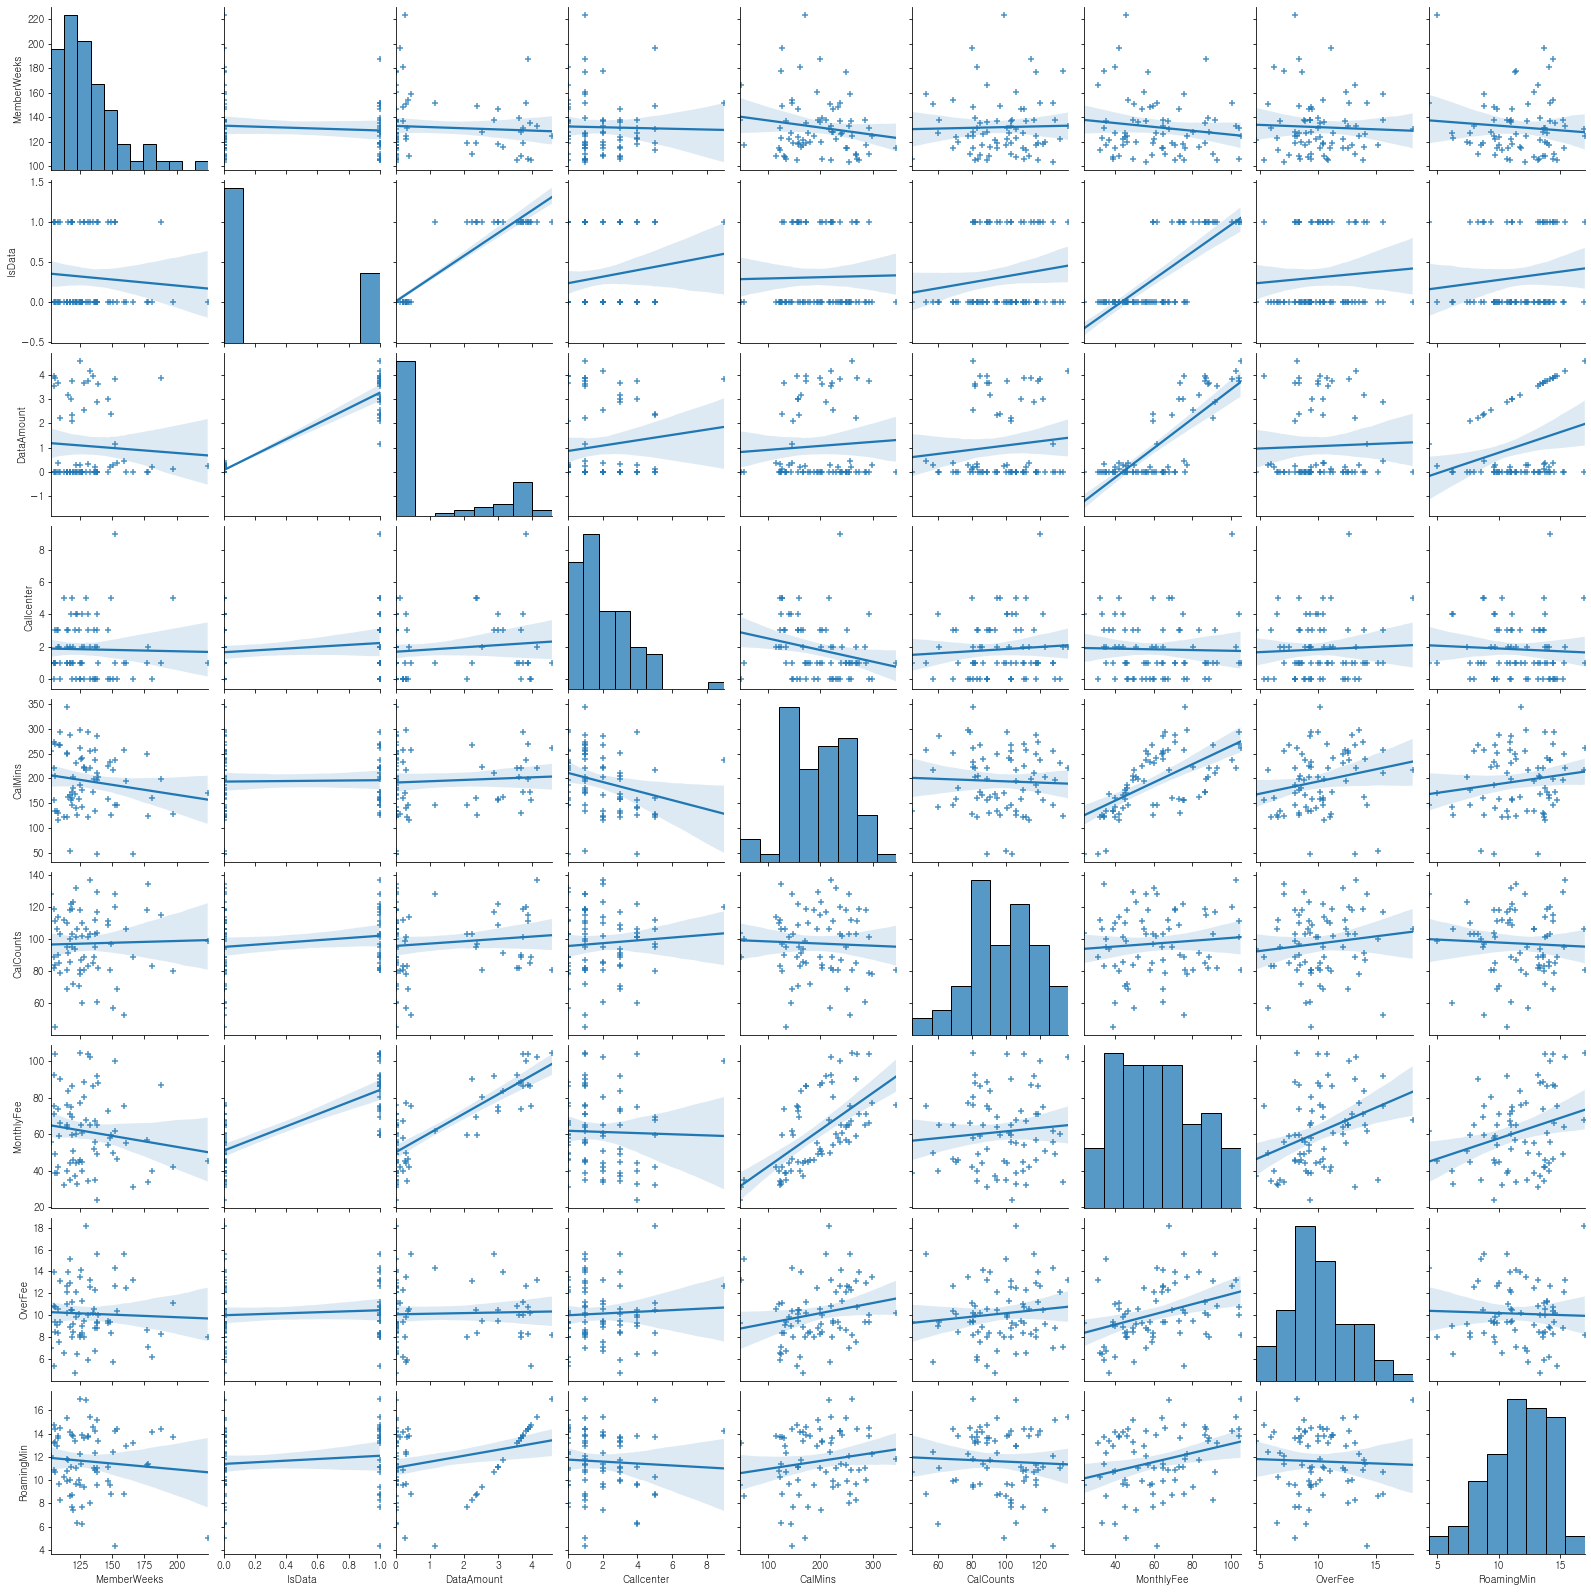

In [57]:
sns.pairplot(df3, kind='reg',markers='+')

<AxesSubplot:>

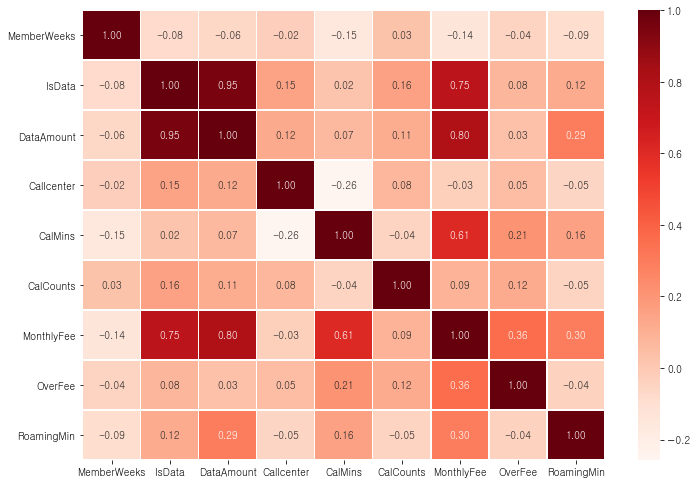

In [58]:
sns.heatmap(data=corr, annot=True, fmt='.2f',linewidths=.5,cmap='Reds')

# 전체적인 상관관계분석을 해보았으나 각 특성들간 특정한 상관관계만 확인이 됨. 이 후 Leave에 초점을 맞추어 방향을 잡음

* Leave로 정렬을 해보고, value_counts로 이탈자 비율 확인

In [13]:
df2.sort_values("Leave")

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.699219,1,265.000,110,89.0000,9.867188,10.000000
2117,0,111,1,0,0.000000,4,222.250,96,52.0000,8.132812,11.898438
2120,0,81,1,0,0.000000,1,154.500,84,45.0000,10.812500,13.703125
2121,0,46,1,0,0.000000,1,90.375,108,39.0000,13.812500,12.703125
2122,0,69,1,1,4.429688,0,268.750,78,111.3125,12.328125,16.406250
...,...,...,...,...,...,...,...,...,...,...,...
1263,1,40,1,1,2.029297,1,224.750,69,70.3125,6.730469,7.500000
2119,1,111,1,0,0.000000,0,249.750,109,64.0000,12.117188,11.601562
340,1,89,1,0,0.000000,1,213.000,63,52.0000,8.828125,9.101562
2115,1,138,0,0,0.000000,0,196.250,129,49.0000,8.828125,15.203125


In [23]:
df2['Leave'].value_counts()

0    2850
1     483
Name: Leave, dtype: int64

* 조건1, 서비스를 해지한 고객

In [32]:
cond1=(df2['Leave']==1)

df2.loc[cond1]

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
10,1,65,1,0,0.290039,4,129.12500,137,44.90625,11.429688,12.703125
15,1,161,1,0,0.000000,4,333.00000,67,84.00000,15.890625,5.398438
21,1,77,1,0,0.000000,5,62.40625,89,26.00000,8.500000,5.699219
33,1,12,1,0,0.000000,1,249.62500,118,64.00000,12.617188,11.796875
41,1,135,0,1,3.939453,0,173.12500,85,86.37500,10.203125,14.601562
...,...,...,...,...,...,...,...,...,...,...,...
3301,1,84,1,0,0.000000,0,280.00000,113,65.00000,10.109375,10.398438
3304,1,71,0,0,0.000000,4,186.12500,114,49.00000,9.929688,13.796875
3320,1,122,0,0,0.300049,4,140.00000,101,44.00000,9.820312,9.703125
3322,1,62,1,0,0.000000,4,321.00000,105,78.00000,13.281250,11.500000


* 조건2, 가입갱신하지 않은 고객

In [36]:
cond2=(df2['NewContract']==0)
df2.loc[cond1&cond2]

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
41,1,135,0,1,3.939453,0,173.1250,85,86.3750,10.203125,14.601562
115,1,36,0,1,5.398438,0,196.7500,89,110.0000,12.750000,20.000000
144,1,117,0,0,0.000000,2,167.1250,86,44.0000,8.882812,14.101562
198,1,131,0,1,3.730469,4,293.0000,101,104.3125,9.992188,13.796875
214,1,70,0,0,0.000000,2,226.7500,98,58.0000,11.406250,17.593750
...,...,...,...,...,...,...,...,...,...,...,...
3246,1,77,0,1,3.210938,0,103.1875,117,70.1250,11.820312,11.898438
3255,1,138,0,0,0.000000,2,286.2500,61,65.0000,9.359375,11.000000
3291,1,119,0,1,3.750000,1,172.1250,119,86.5000,11.179688,13.898438
3304,1,71,0,0,0.000000,4,186.1250,114,49.0000,9.929688,13.796875


* 조건1과 2를 만족하는 가입자의 가입기간 확인

In [39]:
df2.loc[cond1&cond2].sort_values('MemberWeeks')

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
1322,1,2,0,0,0.270020,2,132.1250,42,37.68750,6.949219,9.101562
2868,1,17,0,0,0.360107,0,162.7500,118,51.59375,11.476562,13.601562
115,1,36,0,1,5.398438,0,196.7500,89,110.00000,12.750000,20.000000
2118,1,37,0,0,0.000000,0,172.8750,119,45.00000,9.148438,9.796875
2173,1,47,0,0,0.000000,0,47.8125,120,24.00000,8.953125,13.296875
...,...,...,...,...,...,...,...,...,...,...,...
2882,1,178,0,0,0.000000,2,124.5000,134,34.00000,7.058594,11.398438
1752,1,181,0,0,0.209961,0,161.2500,83,40.09375,6.218750,14.101562
2664,1,188,0,1,3.890625,1,198.7500,115,86.87500,8.328125,14.398438
1662,1,197,0,0,0.119995,5,127.3125,80,42.18750,11.117188,13.703125


* 조건3, 가입기간이 101주 이상인 고객, 101주는 df2의 가입기간의 평균을 사용.
* df3은 조건1~3을 해당하는 데이터와 조건에 사용되어 분석에 방해되는 Leave와 NewContract 행 제거

In [55]:
cond3=(df2['MemberWeeks'] >101)
df3 = df2.loc[cond1&cond2&cond3].drop(['Leave','NewContract'], axis=1)
df3

,MemberWeeks,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
41,135,1,3.939453,0,173.1250,85,86.3750,10.203125,14.601562
144,117,0,0.000000,2,167.1250,86,44.0000,8.882812,14.101562
198,131,1,3.730469,4,293.0000,101,104.3125,9.992188,13.796875
241,137,0,0.000000,2,135.1250,95,35.0000,6.710938,12.296875
319,128,1,2.539062,2,223.5000,81,80.3750,9.437500,9.398438
...,...,...,...,...,...,...,...,...,...
3241,177,0,0.000000,1,248.7500,118,57.0000,8.617188,11.296875
3243,113,0,0.000000,5,122.1875,112,32.0000,6.589844,10.296875
3255,138,0,0.000000,2,286.2500,61,65.0000,9.359375,11.000000
3291,119,1,3.750000,1,172.1250,119,86.5000,11.179688,13.898438


* 비교를 하기 위해 df3과 df4의 기술통계량을 확인

In [60]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
MemberWeeks,74.0,131.824324,23.570563,103.000000,116.250000,126.500000,138.000000,224.000000
IsData,74.0,0.310811,0.465985,0.000000,0.000000,0.000000,1.000000,1.000000
DataAmount,74.0,1.060547,1.560547,0.000000,0.000000,0.000000,2.373047,4.589844
Callcenter,74.0,1.824324,1.738824,0.000000,1.000000,1.000000,3.000000,9.000000
CalMins,74.0,194.500000,62.187500,46.500000,146.875000,197.500000,241.625000,345.250000
CalCounts,74.0,97.256757,20.215999,45.000000,83.000000,99.500000,111.750000,137.000000
MonthlyFee,74.0,61.343750,20.593750,24.000000,45.000000,59.812500,75.281250,104.875000
OverFee,74.0,10.140625,2.687500,4.691406,8.363281,9.648438,12.150391,18.187500
RoamingMin,74.0,11.609375,2.712891,4.300781,9.751953,11.550781,13.796875,17.000000


* df2에서 df3의 조건을 배제한 데이터프레임을 df4로 명명. 하지만 mean값에 inf가 방해됨

In [65]:
df4=df2.loc[-(cond1&cond2&cond3)].drop(['Leave','NewContract'], axis=1)
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
MemberWeeks,3259.0,100.366370,39.842094,1.0,73.000000,100.000000,127.000000,243.000000
IsData,3259.0,0.275851,0.447011,0.0,0.000000,0.000000,1.000000,1.000000
DataAmount,3259.0,0.810547,1.265625,0.0,0.000000,0.000000,1.780273,5.398438
Callcenter,3259.0,1.556919,1.304028,0.0,1.000000,1.000000,2.000000,9.000000
CalMins,3259.0,inf,54.218750,0.0,143.625000,179.250000,215.937500,350.750000
CalCounts,3259.0,100.507824,20.063011,0.0,87.000000,101.000000,114.000000,165.000000
MonthlyFee,3259.0,inf,16.296875,14.0,45.000000,53.187500,66.000000,111.312500
OverFee,3259.0,10.046875,2.533203,0.0,8.324219,10.070312,11.773438,18.093750
RoamingMin,3259.0,10.203125,2.787109,0.0,8.500000,10.296875,12.000000,20.000000


* inf값이 존재한다면 널값으로 바꾸고 널값을 드랍

In [74]:
df4.replace([np.inf,-np.inf],np.nan).dropna()


,MemberWeeks,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,128,1,2.699219,1,265.000,110,89.00000,9.867188,10.000000
1,107,1,3.699219,1,161.625,123,82.00000,9.781250,13.703125
2,137,0,0.000000,0,243.375,114,52.00000,6.058594,12.203125
3,84,0,0.000000,2,299.500,71,57.00000,3.099609,6.601562
4,75,0,0.000000,3,166.750,113,41.00000,7.421875,10.101562
...,...,...,...,...,...,...,...,...,...
3328,192,1,2.669922,2,156.250,77,71.68750,10.781250,9.898438
3329,68,0,0.340088,3,231.125,57,56.40625,7.671875,9.601562
3330,28,0,0.000000,2,180.750,109,56.00000,14.437500,14.101562
3331,184,0,0.000000,2,213.750,105,50.00000,7.980469,5.000000


* 구글링결과 float64를 사용하라는 솔루션을 통해 데이터타입 재변경

In [76]:
df4 = pd.read_csv('telco.csv', nrows=3333,
                 dtype={
                     'Leave' : np.int8,
                     'MemberWeeks' : np.int16,
                     'NewContract' : np.int8,
                     'IsData' : np.int8,
                     'DataAmount' : np.float16,
                     'Callcenter' : np.int8,
                     'CalMins' : np.float64,
                     'CalCounts' : np.int16,
                     'MonthlyFee' : np.float64,
                     'OverFee' : np.float16,
                     'RoamingMin' : np.float16,
                 })
df4


,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.699219,1,265.1,110,89.0,9.867188,10.000000
1,0,107,1,1,3.699219,1,161.6,123,82.0,9.781250,13.703125
2,0,137,1,0,0.000000,0,243.4,114,52.0,6.058594,12.203125
3,0,84,0,0,0.000000,2,299.4,71,57.0,3.099609,6.601562
4,0,75,0,0,0.000000,3,166.7,113,41.0,7.421875,10.101562
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.669922,2,156.2,77,71.7,10.781250,9.898438
3329,0,68,1,0,0.340088,3,231.1,57,56.4,7.671875,9.601562
3330,0,28,1,0,0.000000,2,180.8,109,56.0,14.437500,14.101562
3331,0,184,0,0,0.000000,2,213.8,105,50.0,7.980469,5.000000


* df2의 용량보다는 많지만 원본데이터 대비 40% 용량 수준으로 만족할만함.

In [82]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 3332
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MemberWeeks  3259 non-null   int16  
 1   IsData       3259 non-null   int8   
 2   DataAmount   3259 non-null   float16
 3   Callcenter   3259 non-null   int8   
 4   CalMins      3259 non-null   float64
 5   CalCounts    3259 non-null   int16  
 6   MonthlyFee   3259 non-null   float64
 7   OverFee      3259 non-null   float16
 8   RoamingMin   3259 non-null   float16
dtypes: float16(3), float64(2), int16(2), int8(2)
memory usage: 114.6 KB


In [83]:
round(114.6/286.6,2)

0.4

* df4의 평균값이 정상적으로 계산됨을 확인함.
* df3과의 평균값과 비교함

In [77]:
df4=df4.loc[-(cond1&cond2&cond3)].drop(['Leave','NewContract'], axis=1)
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
MemberWeeks,3259.0,100.366370,39.842094,1.0,73.000000,100.000000,127.000000,243.000000
IsData,3259.0,0.275851,0.447011,0.0,0.000000,0.000000,1.000000,1.000000
DataAmount,3259.0,0.810547,1.265625,0.0,0.000000,0.000000,1.780273,5.398438
Callcenter,3259.0,1.556919,1.304028,0.0,1.000000,1.000000,2.000000,9.000000
CalMins,3259.0,179.440319,54.243930,0.0,143.600000,179.300000,215.950000,350.800000
CalCounts,3259.0,100.507824,20.063011,0.0,87.000000,101.000000,114.000000,165.000000
MonthlyFee,3259.0,56.189997,16.304687,14.0,45.000000,53.200000,66.000000,111.300000
OverFee,3259.0,10.046875,2.533203,0.0,8.324219,10.070312,11.773438,18.093750
RoamingMin,3259.0,10.203125,2.787109,0.0,8.500000,10.296875,12.000000,20.000000


In [78]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
MemberWeeks,74.0,131.824324,23.570563,103.000000,116.250000,126.500000,138.000000,224.000000
IsData,74.0,0.310811,0.465985,0.000000,0.000000,0.000000,1.000000,1.000000
DataAmount,74.0,1.060547,1.560547,0.000000,0.000000,0.000000,2.373047,4.589844
Callcenter,74.0,1.824324,1.738824,0.000000,1.000000,1.000000,3.000000,9.000000
CalMins,74.0,194.500000,62.187500,46.500000,146.875000,197.500000,241.625000,345.250000
CalCounts,74.0,97.256757,20.215999,45.000000,83.000000,99.500000,111.750000,137.000000
MonthlyFee,74.0,61.343750,20.593750,24.000000,45.000000,59.812500,75.281250,104.875000
OverFee,74.0,10.140625,2.687500,4.691406,8.363281,9.648438,12.150391,18.187500
RoamingMin,74.0,11.609375,2.712891,4.300781,9.751953,11.550781,13.796875,17.000000


* 각각 데이터 프레임의 평균값들을 구함.
* 해지한 고객들이 무슨 서비스에 불만족했는지를 알아보기 위해 df4에서 df3을 뺌

In [84]:
df3.mean()

MemberWeeks    131.824324
IsData           0.310811
DataAmount       1.060547
Callcenter       1.824324
CalMins        194.500000
CalCounts       97.256757
MonthlyFee      61.343750
OverFee         10.140625
RoamingMin      11.609375
dtype: float64

In [80]:
df4.mean()

MemberWeeks    100.366370
IsData           0.275851
DataAmount       0.810547
Callcenter       1.556919
CalMins        179.440319
CalCounts      100.507824
MonthlyFee      56.189997
OverFee         10.046875
RoamingMin      10.203125
dtype: float64

In [81]:
df4.mean()-df3.mean()

MemberWeeks   -31.457954
IsData         -0.034959
DataAmount     -0.250000
Callcenter     -0.267405
CalMins       -15.059681
CalCounts       3.251068
MonthlyFee     -5.153753
OverFee        -0.093750
RoamingMin     -1.406250
dtype: float64

# 결론
* 해지한 사람들이라 당연히 사용기간(MemberWeeks)이 적음.
* 데이터요금제가입여부(IsData)와 초과요금(OverFee)가 계속 사용하는 고객들에 비해 큰 차이를 보이지 않아 이것이 해지의 원인이라고 볼 수 없음.
* 다만, 해지한 고객들은 계속 사용하는 고객들에 비해서 월평균전화량(CalMins)이 적음.
* 그에 비해서 월평균 전화수(CalCounts)는 오히려 더 많음.
* 이 두 사실을 조합해 보면 짧은 전화는 많이 하지만 오랜 시간 긴 통화는 하지 않는 고객들임을 특성 파악.
* 통신사는 전화 기본요금을 할인하는 요금제를 새롭게 만들 필요성이 있음.